In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                            accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, roc_curve)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.filterwarnings('ignore')

In [89]:
# Load the dataset
df = pd.read_csv('opt.csv')

In [90]:
print(df.head())


   rownames     PID Clinic Group  Age Black White Nat.Am Asian Hisp  ...  \
0         1  100034     NY     C   25   Yes   No     No    No        ...   
1         2  100042     NY     C   21   Yes   No     No    No        ...   
2         3  100067     NY     T   25   No    Yes    No    No   Yes  ...   
3         4  100083     NY     C   36   Yes   No     No    No        ...   
4         5  100091     NY     C   21   No    Yes    No    No   Yes  ...   

  BL..FN BL..S7 V5..AA V5..PG V5..TD  V5..TF V5..PI  V5..CR V5..FN  V5..S7  
0    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
1  22.15  33.02    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
2  12.51  23.31    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  

[5 rows x 172 columns]


In [91]:
print(f"The dimensions of the dataframe are: {df.shape}")

The dimensions of the dataframe are: (823, 172)


In [92]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Columns: 172 entries, rownames to V5..S7
dtypes: float64(86), int64(13), object(73)
memory usage: 1.1+ MB
None


In [93]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

In [94]:
# Create a DataFrame to display missing value information
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Values'] > 0]
missing_info = missing_info.sort_values(by='Percentage', ascending=False)

In [95]:
# Print columns with more than 50% missing values
print("Columns with more than 50% missing values:")
print(missing_info[missing_info['Percentage'] > 50])


Columns with more than 50% missing values:
              Missing Values  Percentage
BL.Drks.Day              810   98.420413
BL.Diab.Type             799   97.083840
BL.Cig.Day               731   88.821385
V5..CR                   498   60.510328
V5.DNA                   498   60.510328
V5.Univ                  498   60.510328
V5..PG                   498   60.510328
V5..AA                   498   60.510328
V5.CR                    498   60.510328
V5.PI                    498   60.510328
V5.TF                    498   60.510328
V5.TD                    498   60.510328
V5.PG                    498   60.510328
V5.AA                    498   60.510328
V5.FN                    498   60.510328
V5.S7                    498   60.510328
V5..TD                   498   60.510328
V5..TF                   498   60.510328
V5..PI                   498   60.510328
V5..S7                   498   60.510328
V5..FN                   498   60.510328
BL.PG                    430   52.247874
BL..TF        

In [96]:
# Clean object type columns by stripping leading/trailing whitespace
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

In [97]:
# Create a 'Race' column for easier analysis
def get_race(row):
    if row['Black'] == 'Yes':
        return 'Black'
    elif row['White'] == 'Yes':
        return 'White'
    elif row['Nat.Am'] == 'Yes':
        return 'Nat.Am'
    elif row['Asian'] == 'Yes':
        return 'Asian'
    elif row['Hisp'] == 'Yes':
        return 'Hisp'
    return 'Unknown'

In [98]:
df['Race'] = df.apply(get_race, axis=1)


Text(0, 0.5, 'Count')

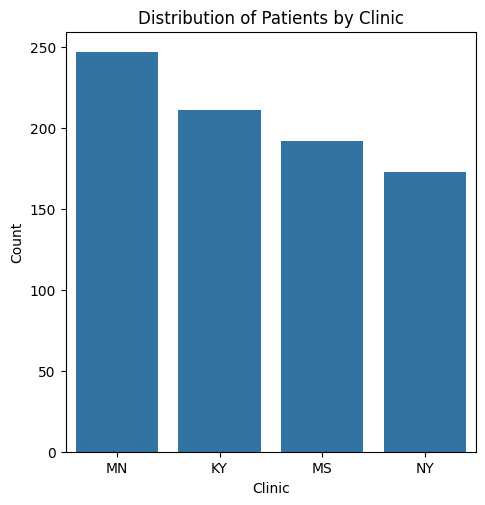

In [99]:
plt.figure(figsize=(18, 12))

# Clinic
plt.subplot(2, 3, 1)
sns.countplot(x='Clinic', data=df, order=df['Clinic'].value_counts().index)
plt.title('Distribution of Patients by Clinic')
plt.xlabel('Clinic')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

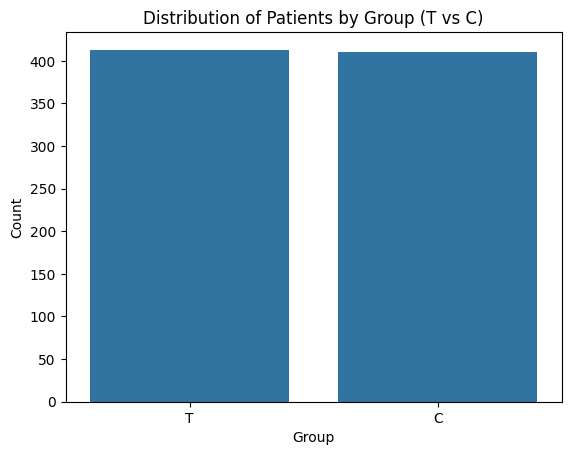

In [100]:
sns.countplot(x='Group', data=df, order=df['Group'].value_counts().index)
plt.title('Distribution of Patients by Group (T vs C)')
plt.xlabel('Group')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

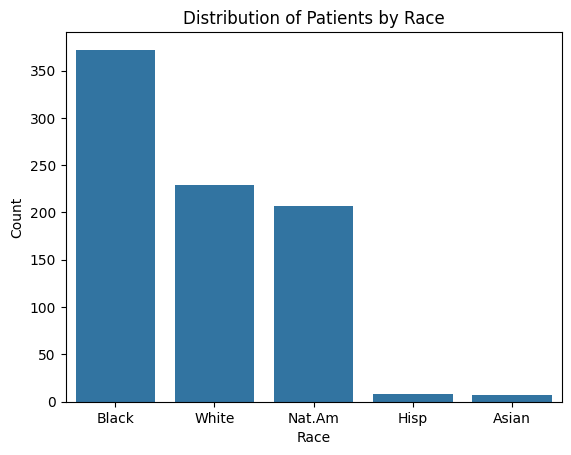

In [101]:
sns.countplot(x='Race', data=df, order=df['Race'].value_counts().index)
plt.title('Distribution of Patients by Race')
plt.xlabel('Race')
plt.ylabel('Count')

Text(0, 0.5, 'Education')

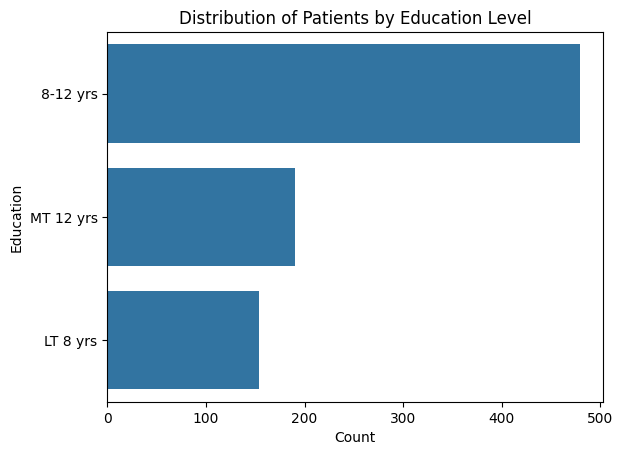

In [102]:
sns.countplot(y='Education', data=df, order=df['Education'].value_counts().index)
plt.title('Distribution of Patients by Education Level')
plt.xlabel('Count')
plt.ylabel('Education')

Text(0, 0.5, 'Count')

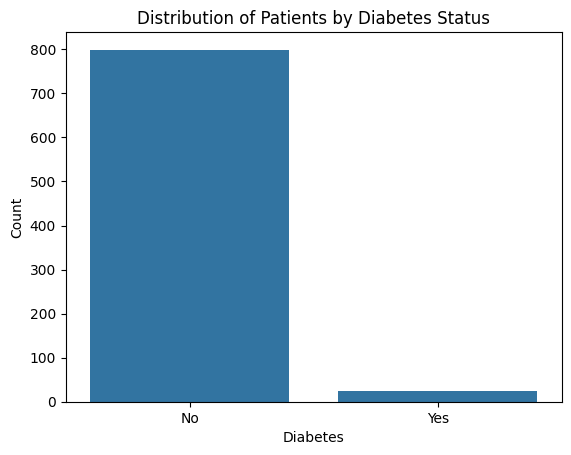

In [103]:
sns.countplot(x='Diabetes', data=df, order=df['Diabetes'].value_counts().index)
plt.title('Distribution of Patients by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('Count')


Text(0, 0.5, 'Frequency')

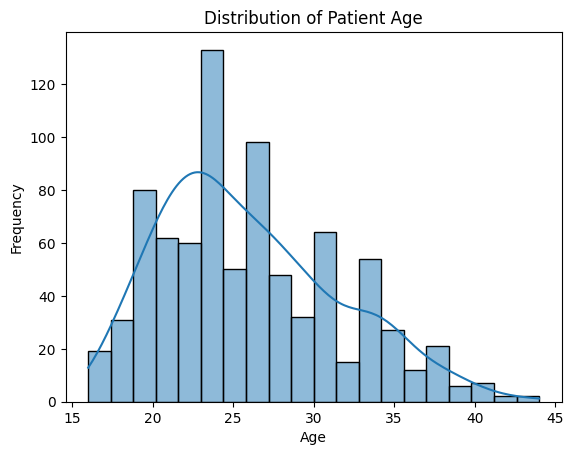

In [104]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Age vs. BMI')

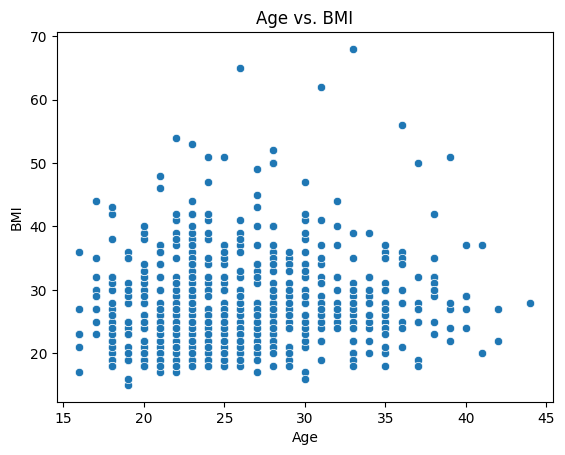

In [105]:
sns.scatterplot(x='Age', y='BMI', data=df)
plt.title('Age vs. BMI')

Text(0.5, 1.0, 'Gestational Age at Outcome by Group')

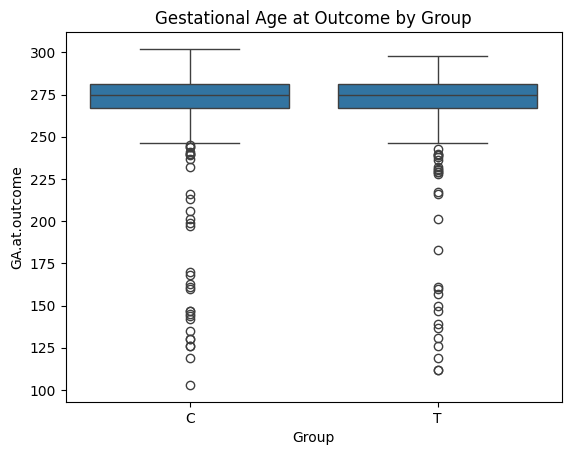

In [106]:
sns.boxplot(x='Group', y='GA.at.outcome', data=df)
plt.title('Gestational Age at Outcome by Group')

Text(0.5, 1.0, 'Gestational Age at Outcome by Race')

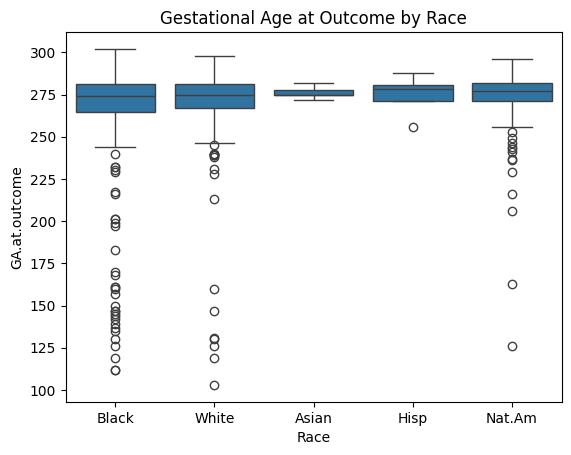

In [107]:
sns.boxplot(x='Race', y='GA.at.outcome', data=df)
plt.title('Gestational Age at Outcome by Race')


<module 'matplotlib.pyplot' from '/home/hrsvrn/miniconda3/envs/pytorch/lib/python3.10/site-packages/matplotlib/pyplot.py'>

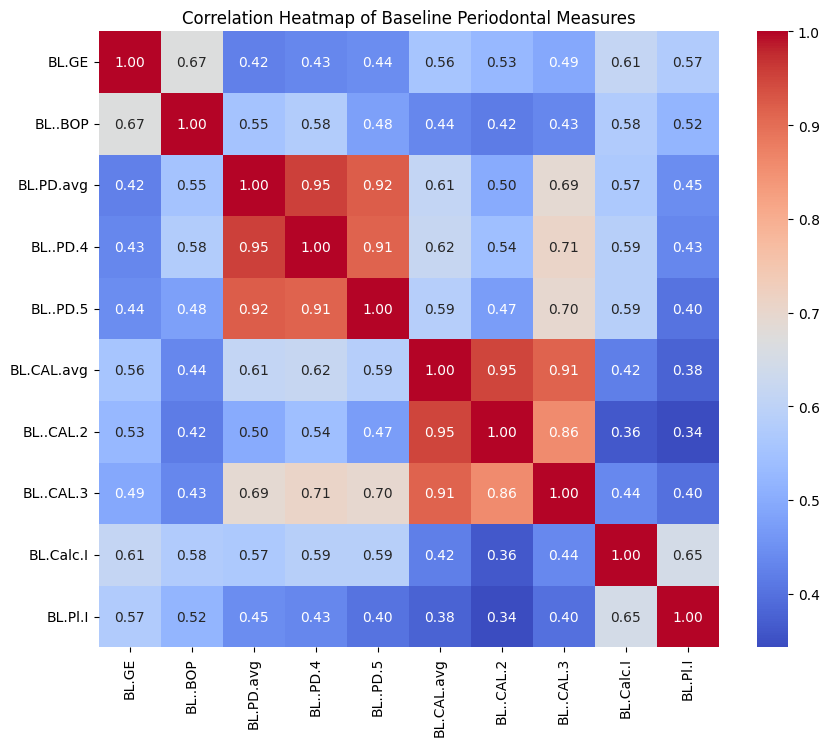

In [108]:
#Multivariate Analysis
baseline_periodontal_cols = ['BL.GE', 'BL..BOP', 'BL.PD.avg', 'BL..PD.4', 'BL..PD.5', 'BL.CAL.avg', 'BL..CAL.2', 'BL..CAL.3', 'BL.Calc.I', 'BL.Pl.I']
corr_matrix = df[baseline_periodontal_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Baseline Periodontal Measures')
plt

In [109]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Phase 2


Summary Statistics:
              Age         BMI   BL.PD.avg  Birthweight
count  823.000000  750.000000  823.000000   809.000000
mean    25.978129   27.669333    2.865181  3198.813350
std      5.565973    7.127299    0.562013   683.301508
min     16.000000   15.000000    1.851000   101.000000
25%     22.000000   23.000000    2.495500  2960.000000
50%     25.000000   26.000000    2.732000  3265.000000
75%     30.000000   31.000000    3.097500  3580.000000
max     44.000000   68.000000    6.967000  5160.000000

Skewness:
Age            0.597532
BMI            1.484198
BL.PD.avg      1.986333
Birthweight   -1.566302
dtype: float64


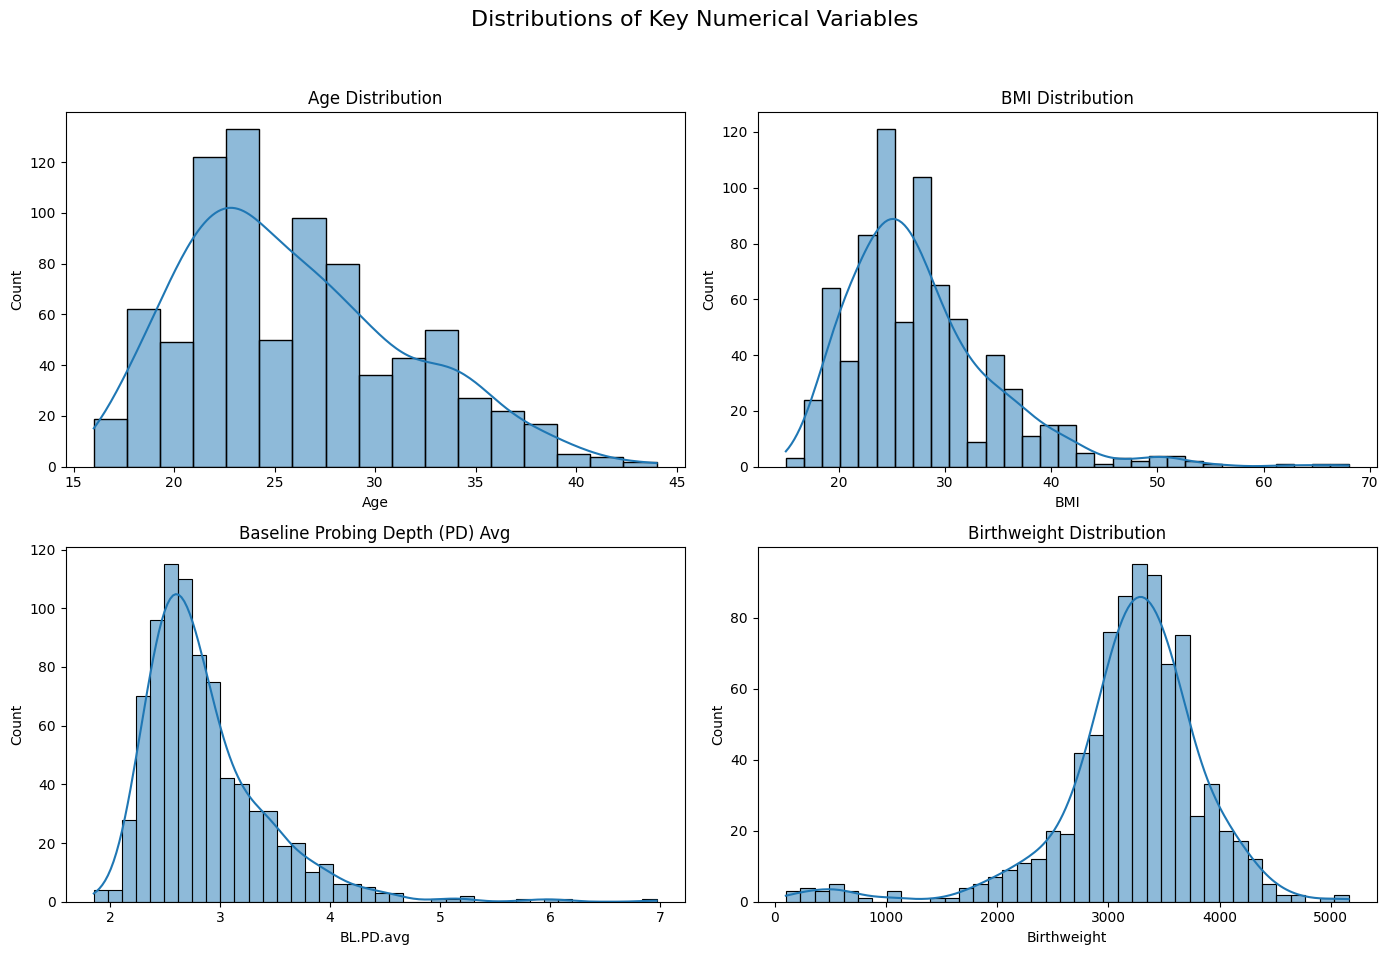

In [110]:
# 1D Analysis: Numerical Variables
numerical_vars = ['Age', 'BMI', 'BL.PD.avg', 'Birthweight']
print("\nSummary Statistics:")
print(df[numerical_vars].describe())

print("\nSkewness:")
print(df[numerical_vars].skew())

# Plotting distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distributions of Key Numerical Variables', fontsize=16)

sns.histplot(df['Age'], kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(df['BMI'], kde=True, ax=axes[0, 1]).set_title('BMI Distribution')
sns.histplot(df['BL.PD.avg'], kde=True, ax=axes[1, 0]).set_title('Baseline Probing Depth (PD) Avg')
sns.histplot(df['Birthweight'], kde=True, ax=axes[1, 1]).set_title('Birthweight Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Frequency distribution for Group:
Group
T    413
C    410
Name: count, dtype: int64
------------------------------

Frequency distribution for Use.Tob:
Use.Tob
No     704
Yes     93
        26
Name: count, dtype: int64
------------------------------

Frequency distribution for Preg.ended...37.wk:
Preg.ended...37.wk
No     711
Yes    103
         9
Name: count, dtype: int64
------------------------------


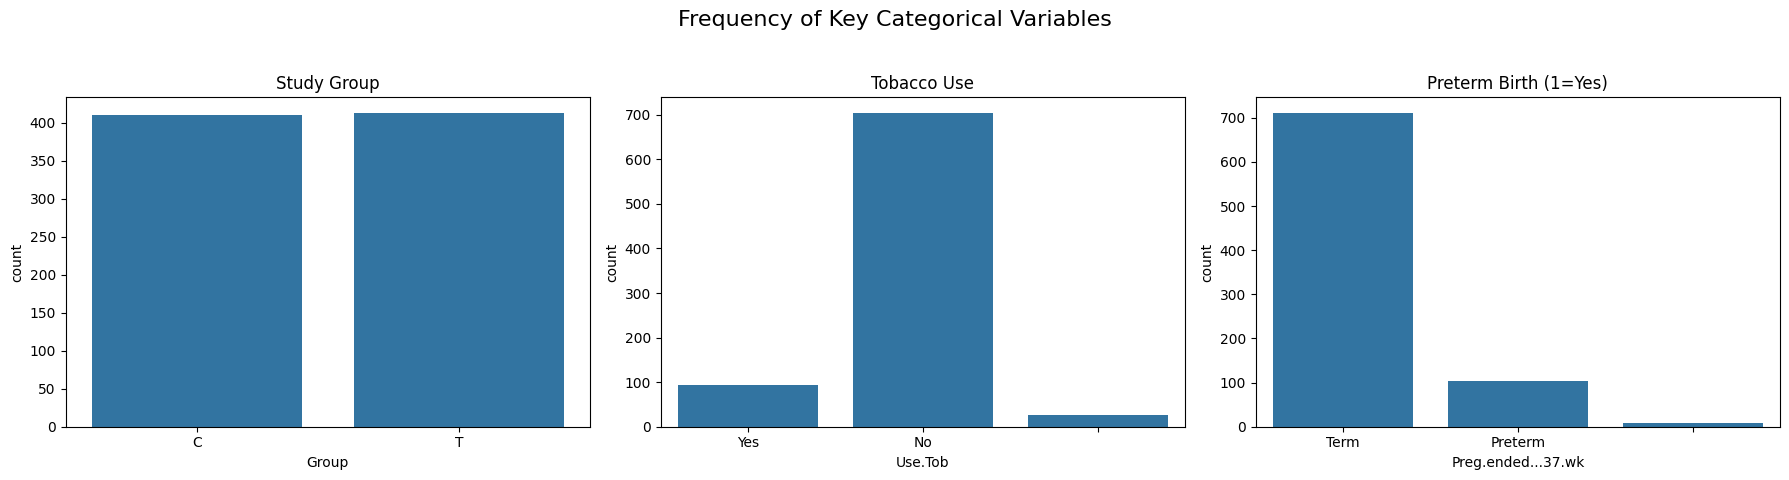

In [111]:
# 1D Analysis: Categorical Variables
categorical_vars = ['Group', 'Use.Tob', 'Preg.ended...37.wk']

for var in categorical_vars:
    print(f"\nFrequency distribution for {var}:")
    print(df[var].value_counts())
    print("-" * 30)

# Plotting distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Frequency of Key Categorical Variables', fontsize=16)

sns.countplot(x='Group', data=df, ax=axes[0]).set_title('Study Group')
sns.countplot(x='Use.Tob', data=df, ax=axes[1]).set_title('Tobacco Use')
sns.countplot(x='Preg.ended...37.wk', data=df, ax=axes[2]).set_title('Preterm Birth (1=Yes)')
axes[2].set_xticklabels(['Term', 'Preterm'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Original data types:
BL.CAL.avg    float64
OCRP1          object
dtype: object
------------------------------

Data types after conversion:
BL.CAL.avg    float64
OCRP1         float64
dtype: object
------------------------------
Pearson Correlation between BL.CAL.avg and OCRP1: 0.048 (p-value: 0.175)


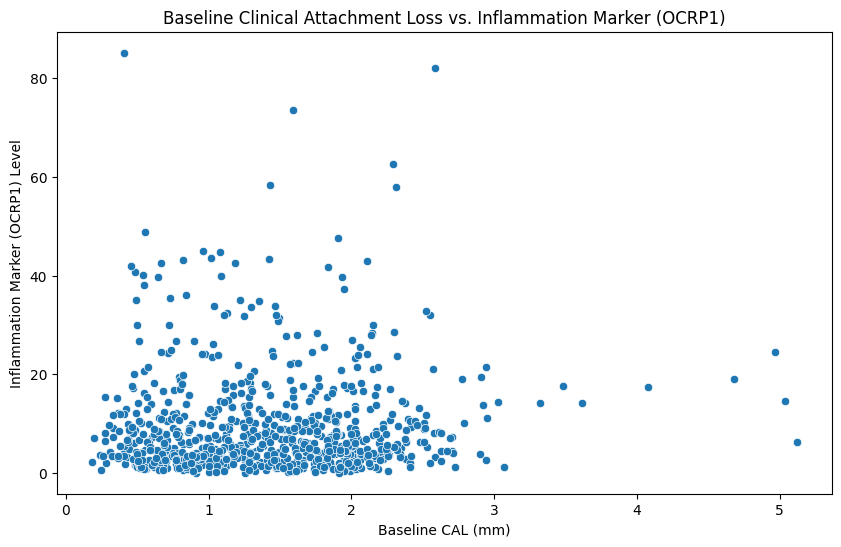

In [112]:
# 2D Analysis: Numerical vs. Numerical


print("Original data types:")
print(df[['BL.CAL.avg', 'OCRP1']].dtypes)
print("-" * 30)

# Convert the columns to a numeric type.
# errors='coerce' will replace any non-numeric values with NaN (Not a Number)
df['BL.CAL.avg'] = pd.to_numeric(df['BL.CAL.avg'], errors='coerce')
df['OCRP1'] = pd.to_numeric(df['OCRP1'], errors='coerce')

# Drop rows where either of these columns has NaN, so the correlation calculation can work
clean_df = df.dropna(subset=['BL.CAL.avg', 'OCRP1'])

print("\nData types after conversion:")
print(clean_df[['BL.CAL.avg', 'OCRP1']].dtypes)
print("-" * 30)

# Hypothesis: Baseline disease severity (BL.CAL.avg) correlates with inflammation (OCRP1).
plt.figure(figsize=(10, 6))
# Use the cleaned dataframe for plotting and calculation
sns.scatterplot(data=clean_df, x='BL.CAL.avg', y='OCRP1')
plt.title('Baseline Clinical Attachment Loss vs. Inflammation Marker (OCRP1)')
plt.xlabel('Baseline CAL (mm)')
plt.ylabel('Inflammation Marker (OCRP1) Level')

# Calculate correlation using the cleaned data
correlation, p_value = stats.pearsonr(clean_df['BL.CAL.avg'], clean_df['OCRP1'])
print(f"Pearson Correlation between BL.CAL.avg and OCRP1: {correlation:.3f} (p-value: {p_value:.3f})")

plt.show()

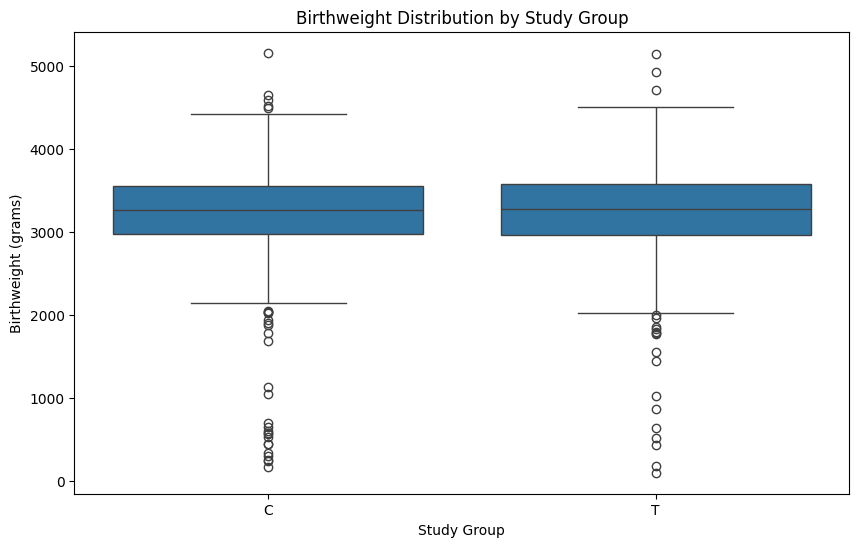

In [113]:
# 2D Analysis: Numerical vs. Categorical
# Hypothesis: Birthweight differs between the Treatment and Control groups.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Group', y='Birthweight')
plt.title('Birthweight Distribution by Study Group')
plt.xlabel('Study Group')
plt.ylabel('Birthweight (grams)')
plt.show()

Contingency Table: Tobacco Use vs. Preterm Birth
Preg.ended...37.wk      No  Yes
Use.Tob                        
                    9   14    3
No                  0  619   85
Yes                 0   78   15


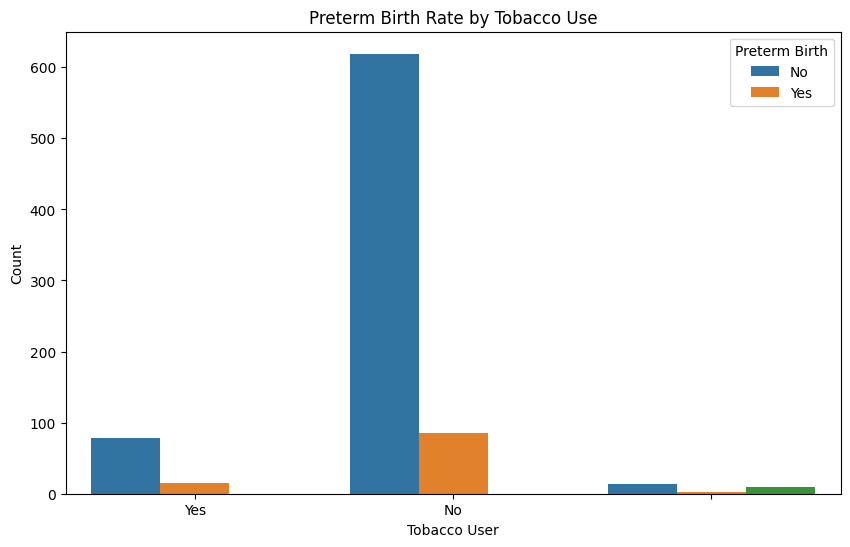

In [114]:
# 2D Analysis: Categorical vs. Categorical
# Hypothesis: The rate of preterm birth differs between smokers and non-smokers.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Use.Tob', hue='Preg.ended...37.wk')
plt.title('Preterm Birth Rate by Tobacco Use')
plt.xlabel('Tobacco User')
plt.ylabel('Count')
plt.legend(title='Preterm Birth', labels=['No', 'Yes'])

# Create a contingency table
contingency_table = pd.crosstab(df['Use.Tob'], df['Preg.ended...37.wk'])
print("Contingency Table: Tobacco Use vs. Preterm Birth")
print(contingency_table)
plt.show()

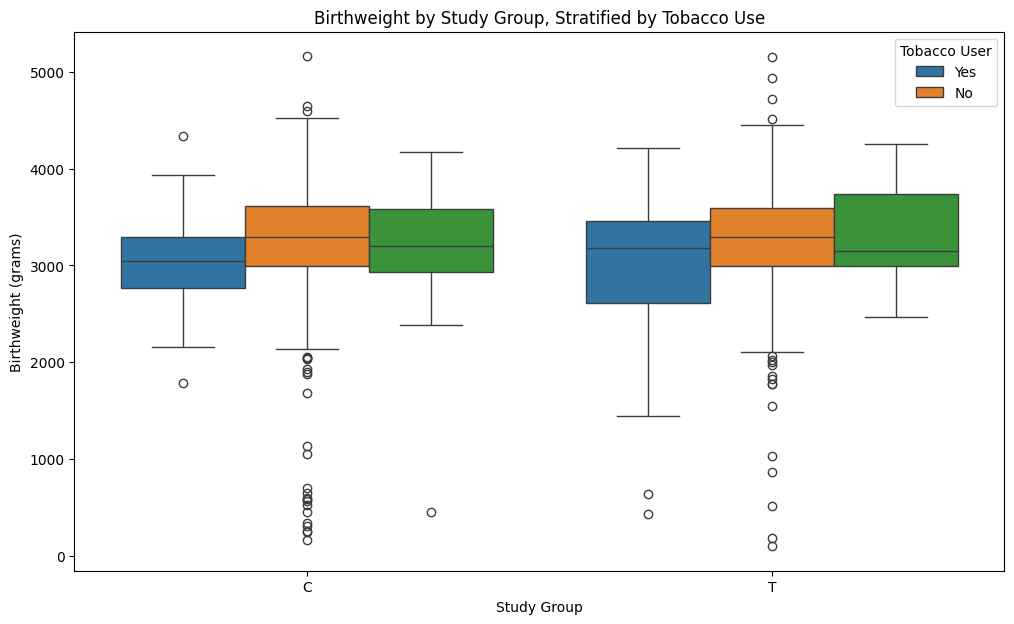

In [115]:
# 3D Analysis: Exploring an interaction effect
# Does the effect of the study Group on Birthweight depend on Tobacco Use?
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Group', y='Birthweight', hue='Use.Tob')
plt.title('Birthweight by Study Group, Stratified by Tobacco Use')
plt.xlabel('Study Group')
plt.ylabel('Birthweight (grams)')
plt.legend(title='Tobacco User')
plt.show()

# This plot helps us visually inspect if, for example, the treatment was more or less effective for smokers vs. non-smokers.

In [116]:
# 1. Select features for clustering
features = ['Age', 'BMI', 'BL.PD.avg', 'BL.CAL.avg', 'OCRP1', 'BL.PG']
df_cluster = df[features].copy()
print(f"Selected {len(features)} features for clustering.")
print(f"Original shape of feature set: {df_cluster.shape}")

df_cluster.dropna(inplace=True)
print(f"Shape after dropping NaNs: {df_cluster.shape}")

# 2. Scale the features (after cleaning the data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
print("\nData has been cleaned and scaled.")

# 3. Apply DBSCAN
# The parameters `eps` and `min_samples` are crucial and often require tuning.
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(df_scaled)

# Add cluster labels back to the original dataframe
# Note: We need to align the cluster labels with the original dataframe, as we may have dropped rows.
# We will add the labels to the cleaned dataframe (`df_cluster`) instead.
df_cluster['Cluster'] = clusters
print("\nDBSCAN has been applied.")

# 4. Analyze the results
print("\nCluster Distribution:")
print(df_cluster['Cluster'].value_counts())
# Cluster -1 represents noise points (outliers).

Selected 6 features for clustering.
Original shape of feature set: (823, 6)
Shape after dropping NaNs: (348, 6)

Data has been cleaned and scaled.

DBSCAN has been applied.

Cluster Distribution:
Cluster
 0    317
-1     26
 1      5
Name: count, dtype: int64


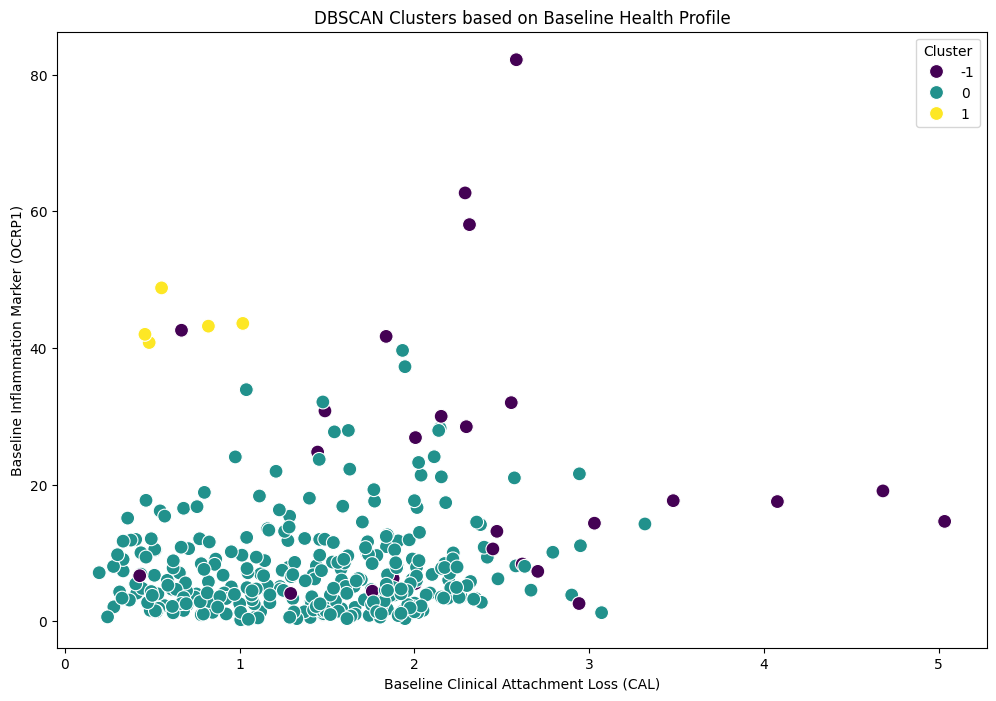

In [117]:
# 5. Visualize the clusters
# Visualizing multi-dimensional clusters is challenging. A common approach is to plot them
# against two of the most important features.

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cluster, x='BL.CAL.avg', y='OCRP1', hue='Cluster', palette='viridis', s=100)

plt.title('DBSCAN Clusters based on Baseline Health Profile')
plt.xlabel('Baseline Clinical Attachment Loss (CAL)')
plt.ylabel('Baseline Inflammation Marker (OCRP1)')
plt.legend(title='Cluster')
plt.show()

# Interpretation: This plot helps us visualize the found clusters. For example, a specific cluster might represent
# patients with both high CAL and high inflammation, while another might represent healthier profiles.
# The noise points (Cluster -1) are individuals who don't fit well into any specific group.

In [118]:

pca_features = ['Age', 'BMI', 'BL.GE', 'BL..BOP', 'BL.PD.avg', 'BL..PD.4', 
                'BL..PD.5', 'BL.CAL.avg', 'BL..CAL.2', 'BL..CAL.3', 
                'BL.Calc.I', 'BL.Pl.I']

# Create a subset with these features and drop NaN values
df_pca = df[pca_features].copy()
print(f"Original PCA dataset shape: {df_pca.shape}")

# Drop rows with missing values
df_pca_clean = df_pca.dropna()
print(f"Clean PCA dataset shape: {df_pca_clean.shape}")
print(f"\nFeatures used for PCA:")
for i, feature in enumerate(pca_features, 1):
    print(f"{i}. {feature}")


Original PCA dataset shape: (823, 12)
Clean PCA dataset shape: (750, 12)

Features used for PCA:
1. Age
2. BMI
3. BL.GE
4. BL..BOP
5. BL.PD.avg
6. BL..PD.4
7. BL..PD.5
8. BL.CAL.avg
9. BL..CAL.2
10. BL..CAL.3
11. BL.Calc.I
12. BL.Pl.I


In [119]:
# Standardize the features before PCA
scaler_pca = StandardScaler()
df_pca_scaled = scaler_pca.fit_transform(df_pca_clean)
print("Data has been standardized for PCA")
print(f"Mean of scaled data (should be ~0): {df_pca_scaled.mean():.6f}")
print(f"Std of scaled data (should be ~1): {df_pca_scaled.std():.6f}")


Data has been standardized for PCA
Mean of scaled data (should be ~0): 0.000000
Std of scaled data (should be ~1): 1.000000


In [120]:
# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(df_pca_scaled)

# Get explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("PCA Analysis Results:")
print("=" * 60)
print(f"Total number of components: {len(explained_variance)}")
print(f"\nVariance explained by each component:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var*100:.2f}%")

print(f"\nCumulative variance explained:")
for i, cum_var in enumerate(cumulative_variance, 1):
    print(f"PC1 to PC{i}: {cum_var*100:.2f}%")
    
# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")


PCA Analysis Results:
Total number of components: 12

Variance explained by each component:
PC1: 52.97%
PC2: 11.40%
PC3: 9.81%
PC4: 8.18%
PC5: 6.74%
PC6: 4.22%
PC7: 2.63%
PC8: 2.02%
PC9: 0.89%
PC10: 0.51%
PC11: 0.44%
PC12: 0.19%

Cumulative variance explained:
PC1 to PC1: 52.97%
PC1 to PC2: 64.37%
PC1 to PC3: 74.18%
PC1 to PC4: 82.37%
PC1 to PC5: 89.10%
PC1 to PC6: 93.32%
PC1 to PC7: 95.95%
PC1 to PC8: 97.97%
PC1 to PC9: 98.86%
PC1 to PC10: 99.37%
PC1 to PC11: 99.81%
PC1 to PC12: 100.00%

Number of components needed for 95% variance: 7


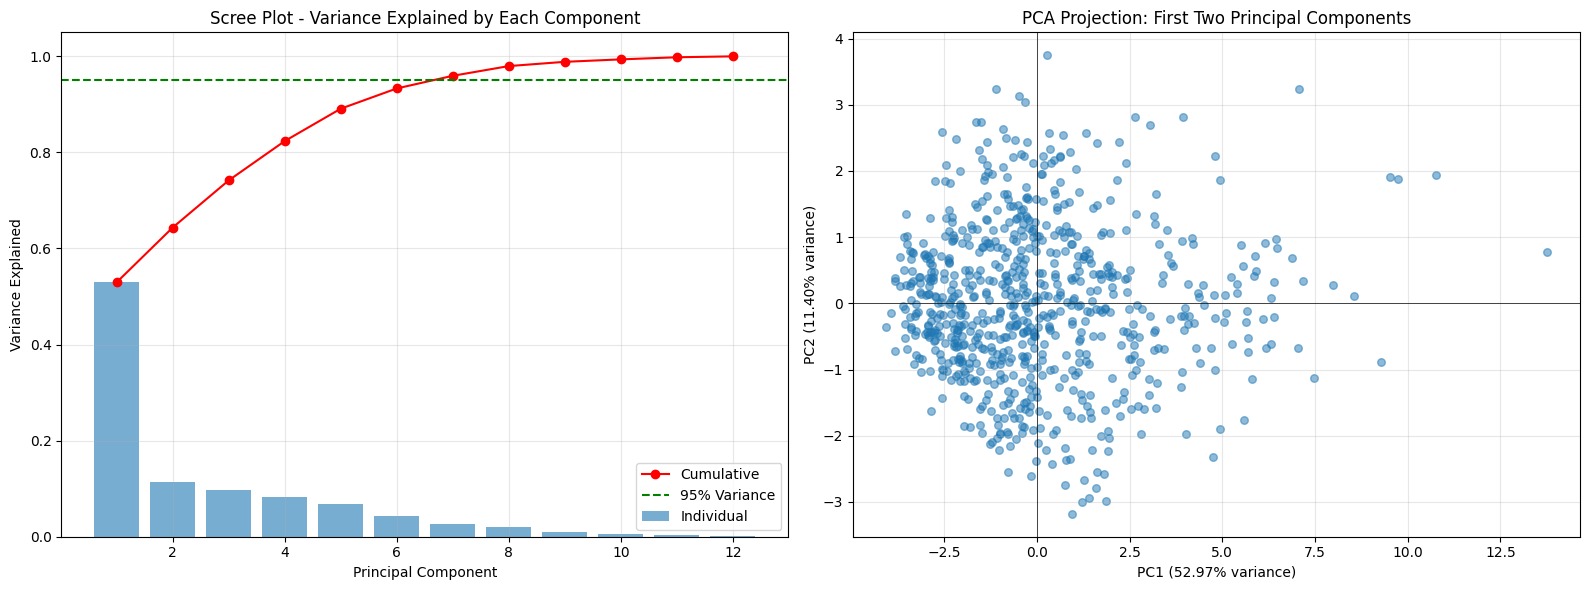

In [121]:
# Visualize PCA results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual')
axes[0].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', label='Cumulative')
axes[0].axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Variance Explained')
axes[0].set_title('Scree Plot - Variance Explained by Each Component')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# PCA biplot (PC1 vs PC2)
axes[1].scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5, s=30)
axes[1].set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)')
axes[1].set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)')
axes[1].set_title('PCA Projection: First Two Principal Components')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()



Feature Loadings on Principal Components:
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
Age         0.302  0.133  0.013  0.834 -0.430  0.059  0.071 -0.053 -0.009   
BMI         0.157  0.441  0.488  0.359  0.642 -0.007 -0.052  0.030  0.003   
BL.GE       0.730 -0.151  0.456 -0.145 -0.142  0.185 -0.288 -0.277 -0.020   
BL..BOP     0.705 -0.320  0.278 -0.073  0.025  0.491  0.229  0.146  0.051   
BL.PD.avg   0.862 -0.141 -0.377  0.078  0.226  0.018  0.053 -0.072 -0.075   
BL..PD.4    0.878 -0.125 -0.359  0.057  0.201  0.049  0.037  0.007 -0.107   
BL..PD.5    0.845 -0.149 -0.403  0.103  0.168 -0.024 -0.113 -0.104  0.083   
BL.CAL.avg  0.836  0.475  0.016 -0.160 -0.153 -0.039  0.000  0.027 -0.035   
BL..CAL.2   0.767  0.523  0.085 -0.232 -0.185 -0.025  0.040  0.088 -0.144   
BL..CAL.3   0.859  0.396 -0.117 -0.120 -0.071 -0.066  0.025  0.017  0.240   
BL.Calc.I   0.738 -0.436  0.168  0.126 -0.096 -0.215 -0.259  0.316  0.001   
BL.Pl.I     0.649 -0.359  0.416 -

<Figure size 1200x600 with 0 Axes>

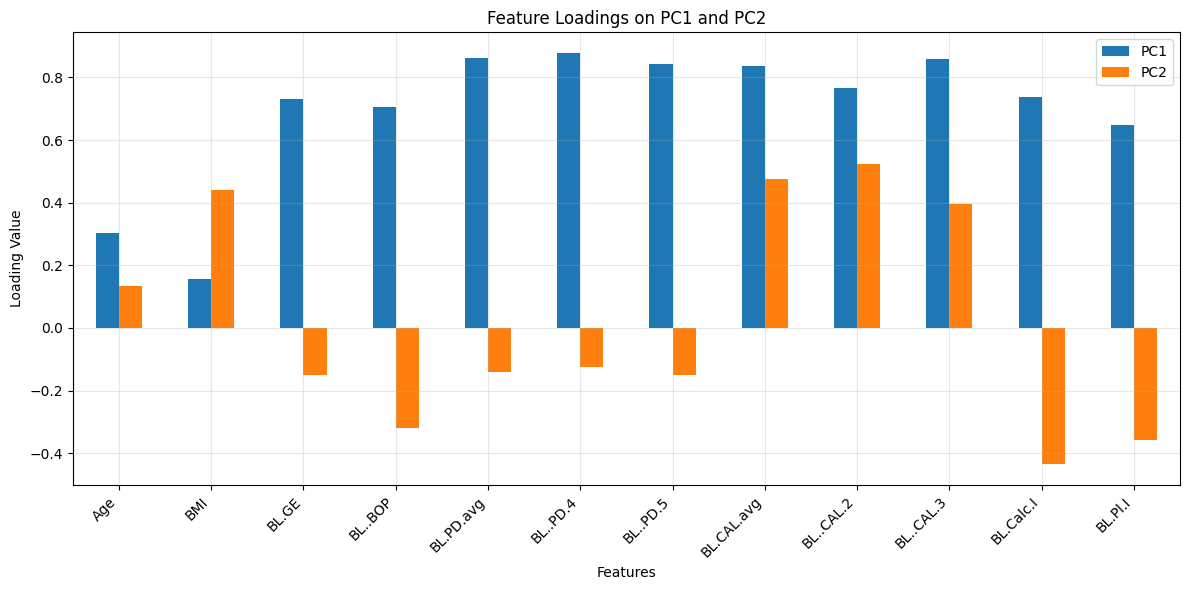

In [122]:
# Feature loadings - which original features contribute most to each PC
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings,
    columns=[f'PC{i+1}' for i in range(len(pca_features))],
    index=pca_features
)

print("\nFeature Loadings on Principal Components:")
print("=" * 60)
print(loading_matrix.round(3))

# Visualize loadings for first two components
plt.figure(figsize=(12, 6))
loading_matrix[['PC1', 'PC2']].plot(kind='bar', figsize=(12, 6))
plt.title('Feature Loadings on PC1 and PC2')
plt.xlabel('Features')
plt.ylabel('Loading Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [123]:

print("Machine Learning libraries imported successfully!")


Machine Learning libraries imported successfully!


In [124]:
# Prepare data for classification
# Target: Preterm birth (Preg.ended...37.wk)
# Features: Age, BMI, Group, tobacco use, baseline periodontal measures

# Create a clean dataset for classification
classification_features = ['Age', 'BMI', 'BL.GE', 'BL..BOP', 'BL.PD.avg', 
                          'BL.CAL.avg', 'BL.Calc.I', 'BL.Pl.I']

# We need to encode categorical variables
df_class = df.copy()

# Encode target variable
# Map 'Yes' to 1 (preterm), 'No' to 0 (term)
df_class['Preterm'] = df_class['Preg.ended...37.wk'].map({'Yes': 1, 'No': 0})

# Encode Group (Treatment vs Control)
df_class['Group_encoded'] = df_class['Group'].map({'T': 1, 'C': 0})

# Encode Tobacco use
df_class['Tobacco_encoded'] = df_class['Use.Tob'].map({'Yes': 1, 'No': 0})

# Add encoded features to feature list
all_features = classification_features + ['Group_encoded', 'Tobacco_encoded']

# Create feature matrix and target
X_class = df_class[all_features].copy()
y_class = df_class['Preterm'].copy()

print(f"Original dataset size: {len(df_class)}")
print(f"Feature columns: {all_features}")

# Drop rows with missing values
valid_indices = X_class.dropna().index
X_class_clean = X_class.loc[valid_indices]
y_class_clean = y_class.loc[valid_indices]

# Also drop NaN from target
valid_target = ~y_class_clean.isna()
X_class_clean = X_class_clean[valid_target]
y_class_clean = y_class_clean[valid_target]

print(f"Clean dataset size: {len(X_class_clean)}")
print(f"\nClass distribution:")
print(y_class_clean.value_counts())
print(f"\nClass proportions:")
print(y_class_clean.value_counts(normalize=True))


Original dataset size: 823
Feature columns: ['Age', 'BMI', 'BL.GE', 'BL..BOP', 'BL.PD.avg', 'BL.CAL.avg', 'BL.Calc.I', 'BL.Pl.I', 'Group_encoded', 'Tobacco_encoded']
Clean dataset size: 725

Class distribution:
Preterm
0.0    633
1.0     92
Name: count, dtype: int64

Class proportions:
Preterm
0.0    0.873103
1.0    0.126897
Name: proportion, dtype: float64


In [125]:
# Split data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_clean, y_class_clean, test_size=0.2, random_state=42, stratify=y_class_clean
)

print(f"Training set size: {len(X_train_class)}")
print(f"Testing set size: {len(X_test_class)}")
print(f"\nTraining set class distribution:")
print(y_train_class.value_counts())
print(f"\nTesting set class distribution:")
print(y_test_class.value_counts())

# Scale the features
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

print("\nData has been split and scaled!")


Training set size: 580
Testing set size: 145

Training set class distribution:
Preterm
0.0    506
1.0     74
Name: count, dtype: int64

Testing set class distribution:
Preterm
0.0    127
1.0     18
Name: count, dtype: int64

Data has been split and scaled!


In [126]:
# Build and train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_class_scaled, y_train_class)

# Make predictions
y_pred_class = log_reg.predict(X_test_class_scaled)
y_pred_proba_class = log_reg.predict_proba(X_test_class_scaled)[:, 1]

print("Logistic Regression Model trained successfully!")
print("\nModel Coefficients (Feature Importance):")
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(feature_importance)


Logistic Regression Model trained successfully!

Model Coefficients (Feature Importance):
           Feature  Coefficient
4        BL.PD.avg    -0.337966
2            BL.GE    -0.334992
5       BL.CAL.avg     0.327932
3          BL..BOP     0.299234
1              BMI     0.224891
0              Age     0.175004
9  Tobacco_encoded     0.163085
6        BL.Calc.I    -0.077859
8    Group_encoded    -0.034303
7          BL.Pl.I     0.001562


In [127]:
# Evaluate Classification Model
print("=" * 70)
print("CLASSIFICATION MODEL EVALUATION - PRETERM BIRTH PREDICTION")
print("=" * 70)

# Calculate metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
roc_auc = roc_auc_score(y_test_class, y_pred_proba_class)

print(f"\nModel Performance Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

print("\n" + "=" * 70)
print("Classification Report:")
print("=" * 70)
print(classification_report(y_test_class, y_pred_class, 
                          target_names=['Term Birth', 'Preterm Birth']))

# Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("\nConfusion Matrix:")
print(cm)


CLASSIFICATION MODEL EVALUATION - PRETERM BIRTH PREDICTION

Model Performance Metrics:
Accuracy:  0.8759
Precision: 0.0000
Recall:    0.0000
F1-Score:  0.0000
ROC-AUC:   0.5350

Classification Report:
               precision    recall  f1-score   support

   Term Birth       0.88      1.00      0.93       127
Preterm Birth       0.00      0.00      0.00        18

     accuracy                           0.88       145
    macro avg       0.44      0.50      0.47       145
 weighted avg       0.77      0.88      0.82       145


Confusion Matrix:
[[127   0]
 [ 18   0]]


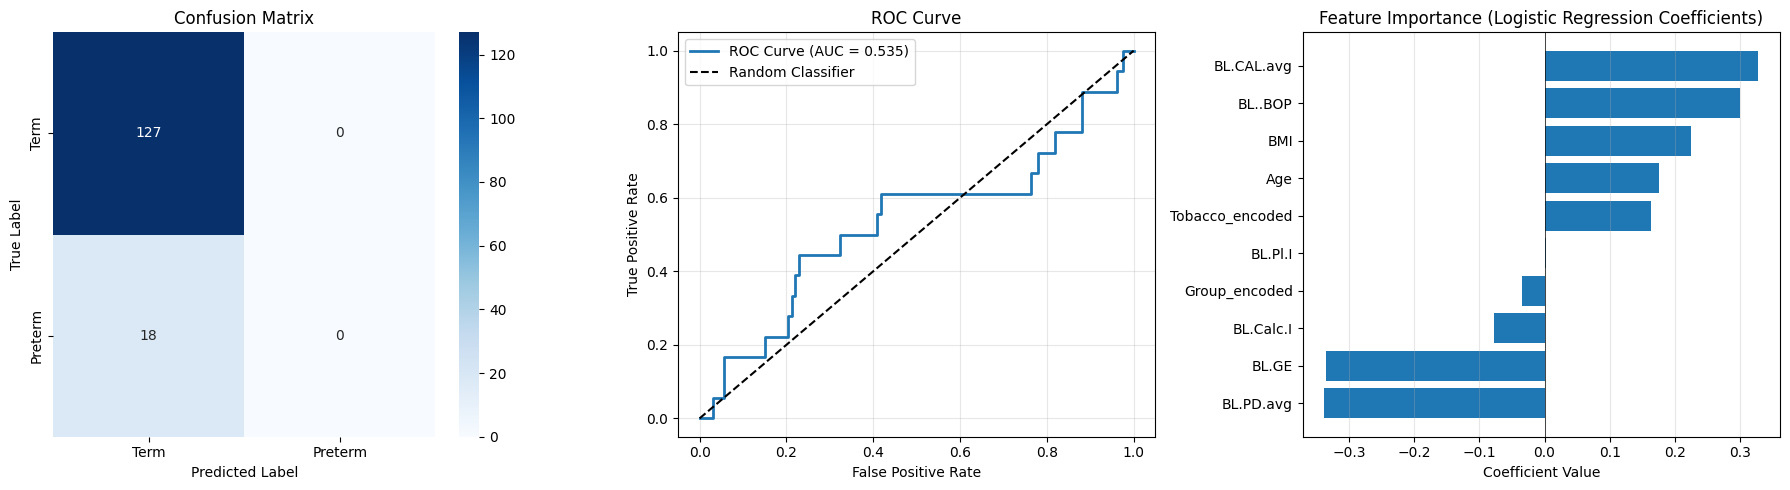

In [128]:
# Visualize Classification Results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Term', 'Preterm'],
            yticklabels=['Term', 'Preterm'])
axes[0].set_title('Confusion Matrix')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_proba_class)
axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Feature Importance
feature_importance_sorted = feature_importance.sort_values('Coefficient', ascending=True)
axes[2].barh(range(len(feature_importance_sorted)), feature_importance_sorted['Coefficient'])
axes[2].set_yticks(range(len(feature_importance_sorted)))
axes[2].set_yticklabels(feature_importance_sorted['Feature'])
axes[2].set_xlabel('Coefficient Value')
axes[2].set_title('Feature Importance (Logistic Regression Coefficients)')
axes[2].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


In [129]:
# Prepare data for regression
# Target: Birthweight
# Features: Age, BMI, GA.at.outcome, Group, tobacco use, baseline periodontal measures

regression_features = ['Age', 'BMI', 'GA.at.outcome', 'BL.GE', 'BL..BOP', 
                       'BL.PD.avg', 'BL.CAL.avg', 'BL.Calc.I', 'BL.Pl.I']

# Create a clean dataset for regression
df_reg = df.copy()

# Encode categorical variables
df_reg['Group_encoded'] = df_reg['Group'].map({'T': 1, 'C': 0})
df_reg['Tobacco_encoded'] = df_reg['Use.Tob'].map({'Yes': 1, 'No': 0})

# Add encoded features
all_reg_features = regression_features + ['Group_encoded', 'Tobacco_encoded']

# Create feature matrix and target
X_reg = df_reg[all_reg_features].copy()
y_reg = df_reg['Birthweight'].copy()

print(f"Original dataset size: {len(df_reg)}")
print(f"Feature columns: {all_reg_features}")

# Drop rows with missing values
valid_indices = X_reg.dropna().index
X_reg_clean = X_reg.loc[valid_indices]
y_reg_clean = y_reg.loc[valid_indices]

# Also drop NaN from target
valid_target = ~y_reg_clean.isna()
X_reg_clean = X_reg_clean[valid_target]
y_reg_clean = y_reg_clean[valid_target]

print(f"Clean dataset size: {len(X_reg_clean)}")
print(f"\nBirthweight statistics:")
print(y_reg_clean.describe())


Original dataset size: 823
Feature columns: ['Age', 'BMI', 'GA.at.outcome', 'BL.GE', 'BL..BOP', 'BL.PD.avg', 'BL.CAL.avg', 'BL.Calc.I', 'BL.Pl.I', 'Group_encoded', 'Tobacco_encoded']
Clean dataset size: 722

Birthweight statistics:
count     722.000000
mean     3194.779778
std       679.353213
min       101.000000
25%      2950.000000
50%      3268.000000
75%      3583.750000
max      5150.000000
Name: Birthweight, dtype: float64


In [130]:
# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_clean, y_reg_clean, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train_reg)}")
print(f"Testing set size: {len(X_test_reg)}")

# Scale the features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print("\nData has been split and scaled!")


Training set size: 577
Testing set size: 145

Data has been split and scaled!


In [131]:
# Build and train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)

# Make predictions
y_pred_reg = lin_reg.predict(X_test_reg_scaled)
y_train_pred_reg = lin_reg.predict(X_train_reg_scaled)

print("Linear Regression Model trained successfully!")
print("\nModel Coefficients (Feature Importance):")
reg_feature_importance = pd.DataFrame({
    'Feature': all_reg_features,
    'Coefficient': lin_reg.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(reg_feature_importance)
print(f"\nIntercept: {lin_reg.intercept_:.2f}")


Linear Regression Model trained successfully!

Model Coefficients (Feature Importance):
            Feature  Coefficient
2     GA.at.outcome   548.124343
1               BMI    67.280240
10  Tobacco_encoded   -39.698187
6        BL.CAL.avg   -29.857580
7         BL.Calc.I    29.308106
3             BL.GE   -28.440833
0               Age    26.276758
5         BL.PD.avg   -25.482204
9     Group_encoded    -9.990890
4           BL..BOP     8.053234
8           BL.Pl.I    -0.298546

Intercept: 3191.60


In [132]:

# Calculate metrics for test set
mse_test = mean_squared_error(y_test_reg, y_pred_reg)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_reg, y_pred_reg)
r2_test = r2_score(y_test_reg, y_pred_reg)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train_reg, y_train_pred_reg)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_reg, y_train_pred_reg)

print(f"\nTest Set Performance:")
print(f"R² Score:                {r2_test:.4f}")
print(f"Mean Squared Error:      {mse_test:.2f}")
print(f"Root Mean Squared Error: {rmse_test:.2f} grams")
print(f"Mean Absolute Error:     {mae_test:.2f} grams")

print(f"\nTraining Set Performance:")
print(f"R² Score:                {r2_train:.4f}")
print(f"Root Mean Squared Error: {rmse_train:.2f} grams")

# Calculate percentage error
mean_birthweight = y_test_reg.mean()
percentage_error = (rmse_test / mean_birthweight) * 100
print(f"\nMean Birthweight:        {mean_birthweight:.2f} grams")
print(f"RMSE as % of mean:       {percentage_error:.2f}%")



Test Set Performance:
R² Score:                0.5575
Mean Squared Error:      177419.04
Root Mean Squared Error: 421.21 grams
Mean Absolute Error:     337.89 grams

Training Set Performance:
R² Score:                0.6348
Root Mean Squared Error: 416.87 grams

Mean Birthweight:        3207.44 grams
RMSE as % of mean:       13.13%


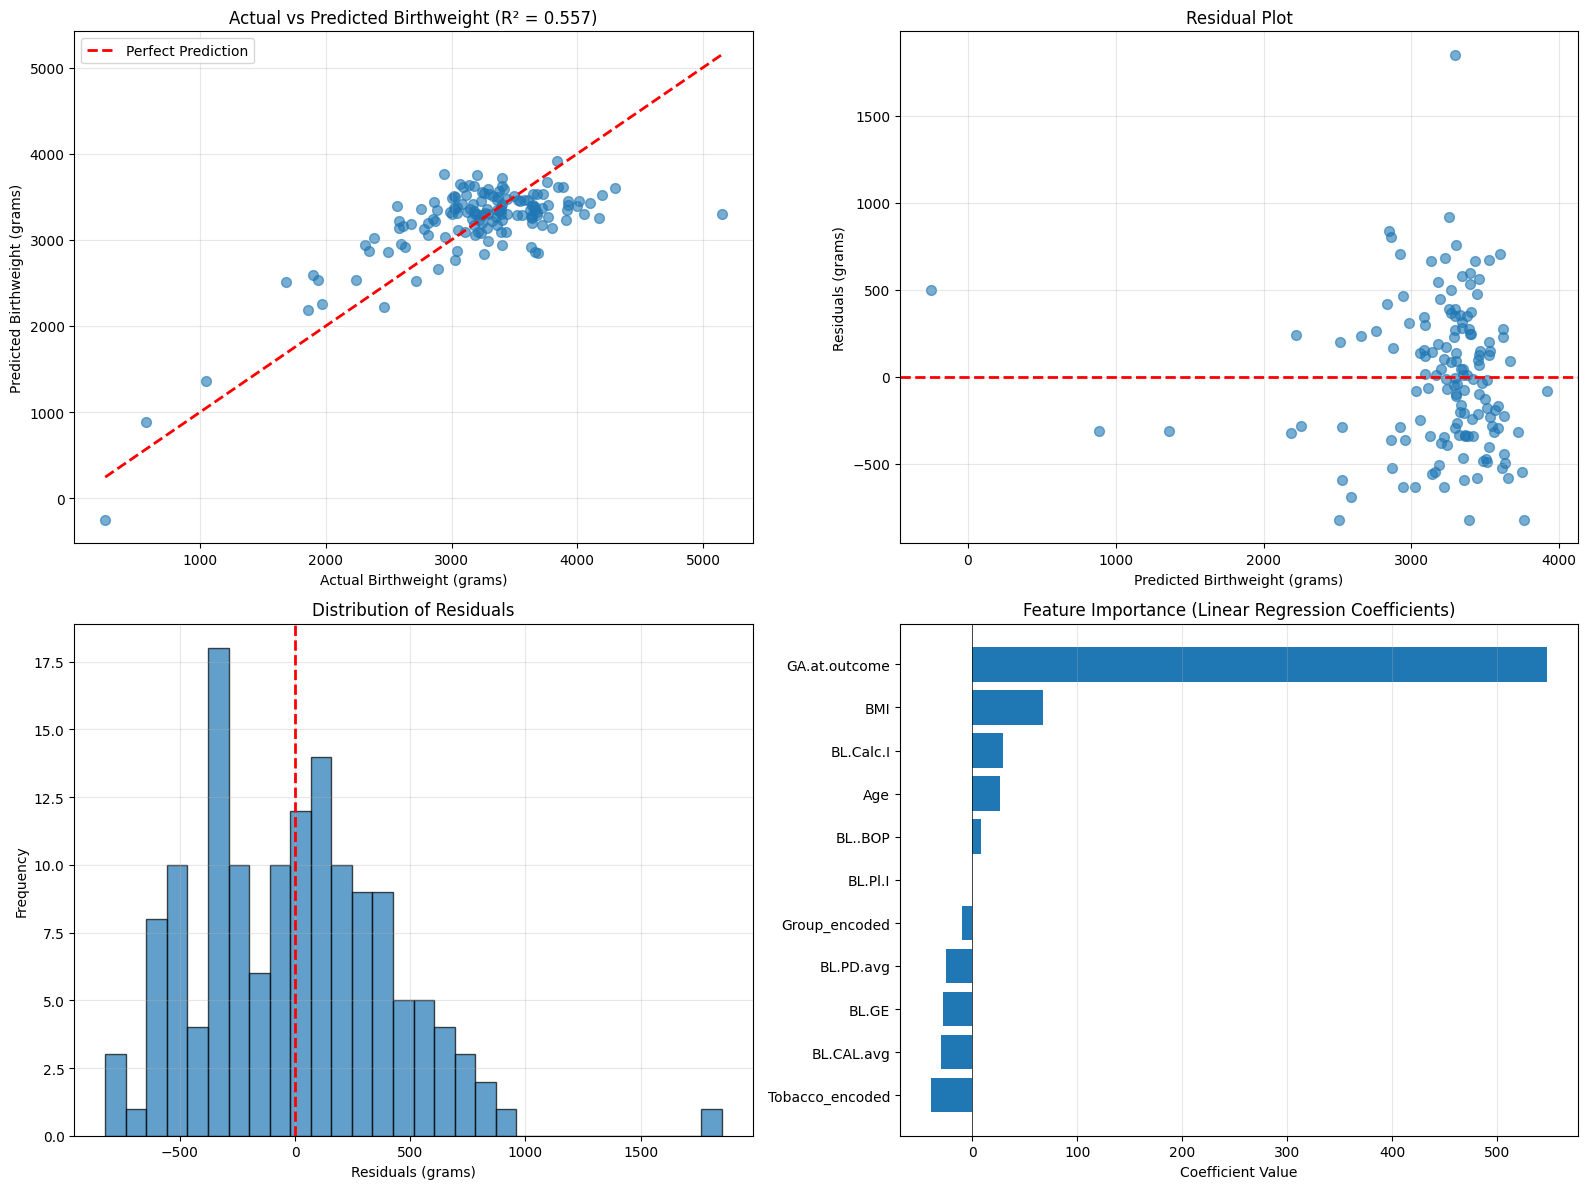

In [133]:
# Visualize Regression Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test_reg, y_pred_reg, alpha=0.6, s=50)
axes[0, 0].plot([y_test_reg.min(), y_test_reg.max()], 
                [y_test_reg.min(), y_test_reg.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Birthweight (grams)')
axes[0, 0].set_ylabel('Predicted Birthweight (grams)')
axes[0, 0].set_title(f'Actual vs Predicted Birthweight (R² = {r2_test:.3f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual Plot
residuals = y_test_reg - y_pred_reg
axes[0, 1].scatter(y_pred_reg, residuals, alpha=0.6, s=50)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Birthweight (grams)')
axes[0, 1].set_ylabel('Residuals (grams)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of Residuals
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Residuals (grams)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# 4. Feature Importance
reg_feature_importance_sorted = reg_feature_importance.sort_values('Coefficient', ascending=True)
axes[1, 1].barh(range(len(reg_feature_importance_sorted)), 
                reg_feature_importance_sorted['Coefficient'])
axes[1, 1].set_yticks(range(len(reg_feature_importance_sorted)))
axes[1, 1].set_yticklabels(reg_feature_importance_sorted['Feature'])
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_title('Feature Importance (Linear Regression Coefficients)')
axes[1, 1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


In [134]:
# Random Forest Classifier for Preterm Birth
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_classifier.fit(X_train_class_scaled, y_train_class)

# Make predictions
y_pred_rf_class = rf_classifier.predict(X_test_class_scaled)
y_pred_proba_rf_class = rf_classifier.predict_proba(X_test_class_scaled)[:, 1]

# Evaluate
rf_accuracy = accuracy_score(y_test_class, y_pred_rf_class)
rf_precision = precision_score(y_test_class, y_pred_rf_class)
rf_recall = recall_score(y_test_class, y_pred_rf_class)
rf_f1 = f1_score(y_test_class, y_pred_rf_class)
rf_roc_auc = roc_auc_score(y_test_class, y_pred_proba_rf_class)

print(f"\nModel Performance Metrics:")
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print(f"ROC-AUC:   {rf_roc_auc:.4f}")

print("\n" + "=" * 70)
print("COMPARISON: Logistic Regression vs Random Forest")
print("=" * 70)
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Logistic Regression': [accuracy, precision, recall, f1, roc_auc],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc]
})
print(comparison_df.to_string(index=False))



Model Performance Metrics:
Accuracy:  0.8759
Precision: 0.0000
Recall:    0.0000
F1-Score:  0.0000
ROC-AUC:   0.5700

COMPARISON: Logistic Regression vs Random Forest
   Metric  Logistic Regression  Random Forest
 Accuracy             0.875862       0.875862
Precision             0.000000       0.000000
   Recall             0.000000       0.000000
 F1-Score             0.000000       0.000000
  ROC-AUC             0.534996       0.569991


In [135]:
# Random Forest Regressor for Birthweight
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_regressor.fit(X_train_reg_scaled, y_train_reg)

# Make predictions
y_pred_rf_reg = rf_regressor.predict(X_test_reg_scaled)

# Evaluate
rf_mse = mean_squared_error(y_test_reg, y_pred_rf_reg)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_reg, y_pred_rf_reg)
rf_r2 = r2_score(y_test_reg, y_pred_rf_reg)
print(f"\nModel Performance Metrics:")
print(f"R² Score:                {rf_r2:.4f}")
print(f"Mean Squared Error:      {rf_mse:.2f}")
print(f"Root Mean Squared Error: {rf_rmse:.2f} grams")
print(f"Mean Absolute Error:     {rf_mae:.2f} grams")

print("\n" + "=" * 70)
print("COMPARISON: Linear Regression vs Random Forest")
print("=" * 70)
reg_comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE (grams)', 'MAE (grams)'],
    'Linear Regression': [r2_test, rmse_test, mae_test],
    'Random Forest': [rf_r2, rf_rmse, rf_mae]
})
print(reg_comparison_df.to_string(index=False))



Model Performance Metrics:
R² Score:                0.5568
Mean Squared Error:      177705.12
Root Mean Squared Error: 421.55 grams
Mean Absolute Error:     331.57 grams

COMPARISON: Linear Regression vs Random Forest
      Metric  Linear Regression  Random Forest
    R² Score           0.557488       0.556774
RMSE (grams)         421.211400     421.550856
 MAE (grams)         337.887015     331.566478


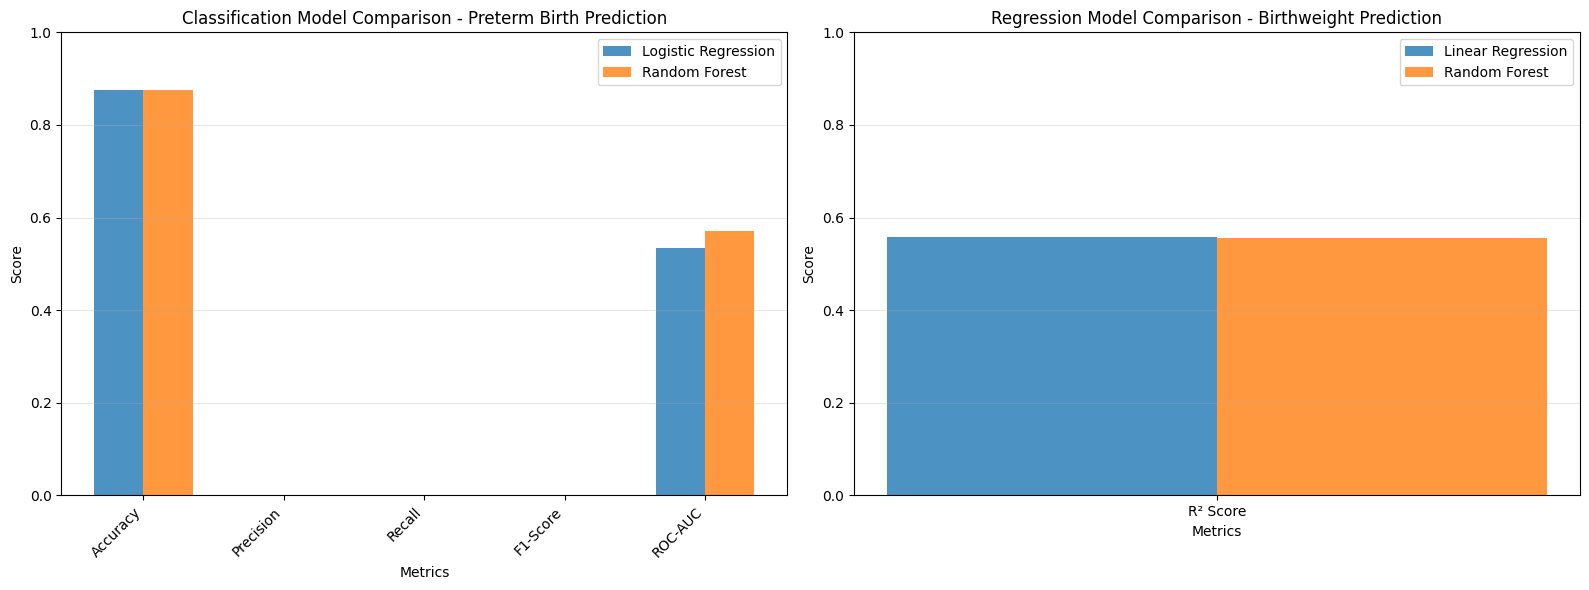

In [136]:
# Visualize Model Comparisons
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Classification comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
log_reg_scores = [accuracy, precision, recall, f1, roc_auc]
rf_class_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, log_reg_scores, width, label='Logistic Regression', alpha=0.8)
axes[0].bar(x + width/2, rf_class_scores, width, label='Random Forest', alpha=0.8)
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Classification Model Comparison - Preterm Birth Prediction')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1])

# Regression comparison
reg_metrics = ['R² Score']
lin_reg_scores = [r2_test]
rf_reg_scores = [rf_r2]

x_reg = np.arange(len(reg_metrics))
axes[1].bar(x_reg - width/2, lin_reg_scores, width, label='Linear Regression', alpha=0.8)
axes[1].bar(x_reg + width/2, rf_reg_scores, width, label='Random Forest', alpha=0.8)
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Score')
axes[1].set_title('Regression Model Comparison - Birthweight Prediction')
axes[1].set_xticks(x_reg)
axes[1].set_xticklabels(reg_metrics)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()
